**SVM Implementation and Analysis**

In [459]:
# ---------------------------------
# Machine Learning Project work
# Taha Heidari
# 2021
# SVM Implementation and Analysis
# Dataset: Adult-Income Dataset
# ---------------------------------
# Obejctives: 
# Task 1 : Implement linear and non-linear SVM Algortihm on a generated dataset
# Task 2 : Implement linear and non-linear SVM Algortihm on Adult-Income dataset

**Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

# **1-A**

**Generate Data**

In [41]:
# Train Set & Test Set Sizes
train_set_size = 80
test_set_size = 40

# Functions for Converting Coordinate
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return x , y

# First Class for Train Data
rho_1 = np.random.uniform(0, 2, np.int(train_set_size/2))
degree_1 = np.random.uniform(0, 2*pi, np.int(train_set_size/2))
x_train_1 = np.zeros((np.int(train_set_size/2), 2))
for i in range(np.int(train_set_size/2)):
    x_train_1[i, 0], x_train_1[i, 1] = pol2cart(rho_1[i], degree_1[i])
y_train_1 = np.full((np.int(train_set_size/2), 1), 1)

# Second Class for Train Data
rho_2 = np.random.uniform(3, 5, np.int(train_set_size/2))
degree_2 = np.random.uniform(0, 2*pi, np.int(train_set_size/2))
x_train_2 = np.zeros((np.int(train_set_size/2), 2))
for i in range(np.int(train_set_size/2)):
    x_train_2[i, 0], x_train_2[i, 1] = pol2cart(rho_2[i], degree_2[i])
y_train_2 = np.full((np.int(train_set_size/2), 1), -1)

# Combine Two Class for Train Data
x_train = np.concatenate((x_train_1, x_train_2), 0)
y_train = np.concatenate((y_train_1, y_train_2), 0)

# First Class for Test Data
rho_1 = np.random.uniform(0, 2, np.int(test_set_size/2))
degree_1 = np.random.uniform(0, 2*pi, np.int(test_set_size/2))
x_test_1 = np.zeros((np.int(test_set_size/2), 2))
for i in range(np.int(test_set_size/2)):
    x_test_1[i, 0], x_test_1[i, 1] = pol2cart(rho_1[i], degree_1[i])
y_test_1 = np.full((np.int(test_set_size/2), 1), 1)

# Second Class for Test Data
rho_2 = np.random.uniform(3, 5, np.int(test_set_size/2))
degree_2 = np.random.uniform(0, 2*pi, np.int(test_set_size/2))
x_test_2 = np.zeros((np.int(test_set_size/2), 2))
for i in range(np.int(test_set_size/2)):
    x_test_2[i, 0], x_test_2[i, 1] = pol2cart(rho_2[i], degree_2[i])
y_test_2 = np.full((np.int(test_set_size/2), 1), -1)

# Combine Two Class for Test Data
x_test = np.concatenate((x_test_1, x_test_2), 0)
y_test = np.concatenate((y_test_1, y_test_2), 0)

**Plot Data**

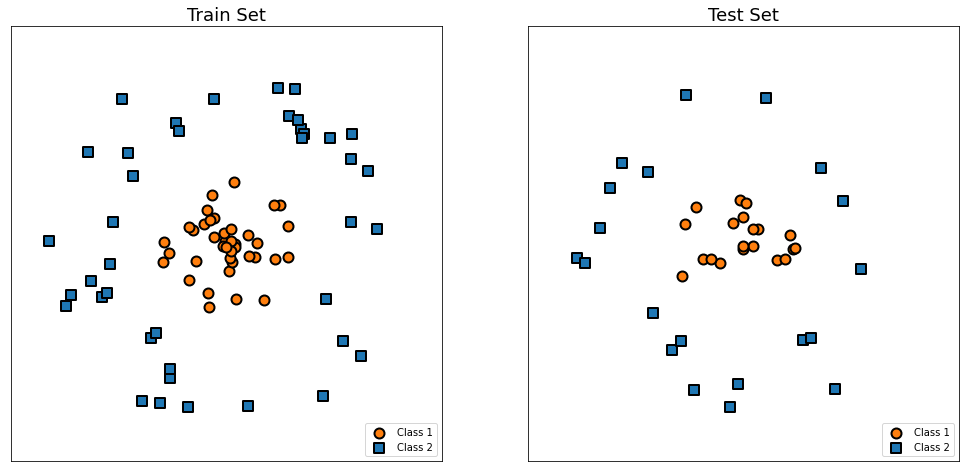

In [79]:
# Plot Data
fig, axs = plt.subplots(1, 2, figsize=(17, 8))
axs[0].scatter(x_train_1[:, 0], x_train_1[:, 1], s=100, color='tab:orange', marker='o', edgecolors='k', linewidth=2, label='Class 1')
axs[0].scatter(x_train_2[:, 0], x_train_2[:, 1], s=100, color='tab:blue', marker='s', edgecolors='k', linewidth=2, label='Class 2')
axs[0].set_xlim(-6, 6)
axs[0].set_ylim(-6, 6)
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_title('Train Set', fontsize=18)
axs[0].legend(loc='lower right')
axs[1].scatter(x_test_1[:, 0], x_test_1[:, 1], s=100, color='tab:orange', marker='o', edgecolors='k', linewidth=2, label='Class 1')
axs[1].scatter(x_test_2[:, 0], x_test_2[:, 1], s=100, color='tab:blue', marker='s', edgecolors='k', linewidth=2, label='Class 2')
axs[1].set_xlim(-6, 6)
axs[1].set_ylim(-6, 6)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_title('Test Set', fontsize=18)
axs[1].legend(loc='lower right')

**SVM**

In [42]:
# SVM
Linear_SVM = SVC(kernel='linear')
Linear_SVM.fit(x_train, y_train)

# Accuracy
y_train_pred = Linear_SVM.predict(x_train)
y_test_pred = Linear_SVM.predict(x_test)
acc_train = 100 * accuracy_score(y_train,y_train_pred)
acc_test = 100 * accuracy_score(y_test,y_test_pred)
print('---------------------')
print('Train Accuracy :', str(round(acc_train, 2)), '%')
print('Test Accuracy :', str(round(acc_test, 2)), '%')
print('---------------------')

---------------------
Train Accuracy : 70.0 %
Test Accuracy : 65.0 %
---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Plot for Training Data**

Text(0.5, 1.0, 'SVM on Train Set')

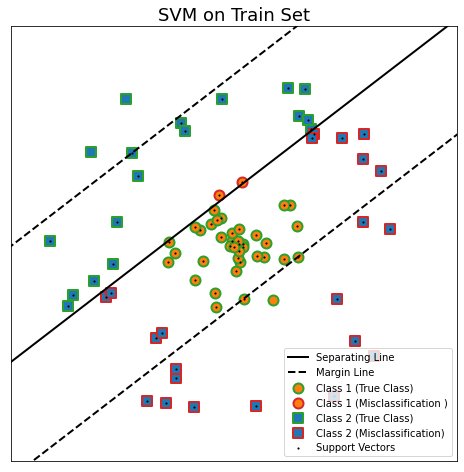

In [43]:
plt.figure(figsize=(8, 8))

# Predict Classes
y_train_1_pred = Linear_SVM.predict(x_train_1)
y_train_2_pred = Linear_SVM.predict(x_train_2)
y_test_1_pred = Linear_SVM.predict(x_test_1)
y_test_1_pred = Linear_SVM.predict(x_test_2)

# Plot Data
for i in range(x_train_1.shape[0]):
    if Linear_SVM.predict(x_train_1[i, :].reshape(1, -1)) == y_train_1[i, :] :
        plt.scatter(x_train_1[i, 0], x_train_1[i, 1], s=100, color='tab:orange', marker='o', edgecolors='tab:green', linewidth=2, label='Class 1 (True Class)')
    else:
        plt.scatter(x_train_1[i, 0], x_train_1[i, 1], s=100, color='tab:orange', marker='o', edgecolors='tab:red', linewidth=2, label='Class 1 (Misclassification )')

for i in range(x_train_2.shape[0]):
    if Linear_SVM.predict(x_train_2[i, :].reshape(1, -1)) == y_train_2[i, :] :
        plt.scatter(x_train_2[i, 0], x_train_2[i, 1], s=100, color='tab:blue', marker='s', edgecolors='tab:green', linewidth=2, label='Class 2 (True Class)')
    else:
        plt.scatter(x_train_2[i, 0], x_train_2[i, 1], s=100, color='tab:blue', marker='s', edgecolors='tab:red', linewidth=2, label='Class 2 (Misclassification)')

# Plor Support Vectors
plt.scatter(Linear_SVM.support_vectors_[:, 0], Linear_SVM.support_vectors_[:, 1], s=5, color='k', marker='.', label='Support Vectors')

# Plor Lines
svm_w = Linear_SVM.coef_[0]
svm_m = -svm_w[0] / svm_w[1]
x = np.linspace(-7, 7)
plt.plot(x, svm_m * x - Linear_SVM.intercept_[0] / svm_w[1], 'k', linewidth=2, label='Separating Line')
plt.plot(x, svm_m * x - (Linear_SVM.intercept_[0] - 1) / svm_w[1], 'k--', linewidth=2, label='Margin Line')
plt.plot(x, svm_m * x - (Linear_SVM.intercept_[0] + 1) / svm_w[1], 'k--', linewidth=2, label='Margin Line')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='lower right')
plt.xticks([])
plt.yticks([])
plt.title('SVM on Train Set', fontsize=18)

**Plot for Testing Data**

Text(0.5, 1.0, 'SVM on Test Set')

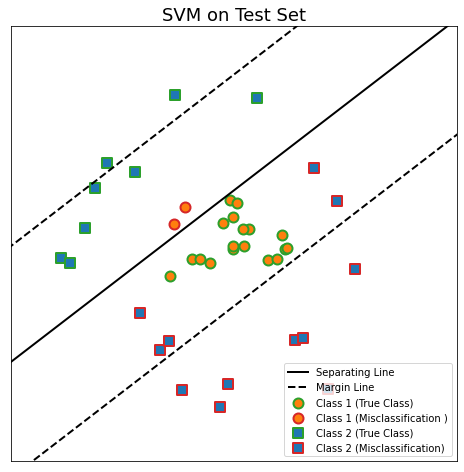

In [49]:
plt.figure(figsize=(8, 8))

y_test_1_pred = Linear_SVM.predict(x_test_1)
y_test_2_pred = Linear_SVM.predict(x_test_2)
y_test_1_pred = Linear_SVM.predict(x_test_1)
y_test_1_pred = Linear_SVM.predict(x_test_2)

for i in range(x_test_1.shape[0]):
    if Linear_SVM.predict(x_test_1[i, :].reshape(1, -1)) == y_test_1[i, :] :
        plt.scatter(x_test_1[i, 0], x_test_1[i, 1], s=100, color='tab:orange', marker='o', edgecolors='tab:green', linewidth=2, label='Class 1 (True Class)')
    else:
        plt.scatter(x_test_1[i, 0], x_test_1[i, 1], s=100, color='tab:orange', marker='o', edgecolors='tab:red', linewidth=2, label='Class 1 (Misclassification )')

for i in range(x_test_2.shape[0]):
    if Linear_SVM.predict(x_test_2[i, :].reshape(1, -1)) == y_test_2[i, :] :
        plt.scatter(x_test_2[i, 0], x_test_2[i, 1], s=100, color='tab:blue', marker='s', edgecolors='tab:green', linewidth=2, label='Class 2 (True Class)')
    else:
        plt.scatter(x_test_2[i, 0], x_test_2[i, 1], s=100, color='tab:blue', marker='s', edgecolors='tab:red', linewidth=2, label='Class 2 (Misclassification)')

svm_w = Linear_SVM.coef_[0]
svm_m = -svm_w[0] / svm_w[1]
x = np.linspace(-7, 7)
plt.plot(x, svm_m * x - Linear_SVM.intercept_[0] / svm_w[1], 'k', linewidth=2, label='Separating Line')
plt.plot(x, svm_m * x - (Linear_SVM.intercept_[0] - 1) / svm_w[1], 'k--', linewidth=2, label='Margin Line')
plt.plot(x, svm_m * x - (Linear_SVM.intercept_[0] + 1) / svm_w[1], 'k--', linewidth=2, label='Margin Line')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='lower right')
plt.xticks([])
plt.yticks([])
plt.title('SVM on Test Set', fontsize=18)

# **1-B**

**Find Best C**

---------------------
C with Maximum Validation Accuracy : 1.0
Maximum Training Accuracy : 66.88 %
Maximum Validation Accuracy : 62.5 %
---------------------


Text(0, 0.5, 'Accuracy')

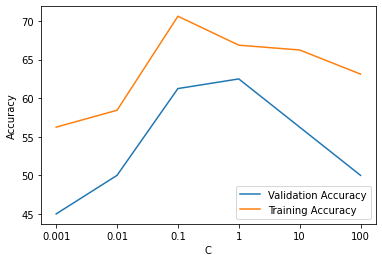

In [74]:
C = np.asarray([0.001, 0.01, 0.1, 1, 10, 100])
kf = KFold(n_splits=5, shuffle=True)
acc_train_c_list = []
acc_val_c_list = []
for c in C:
    acc_train_fold_list = []
    acc_val_fold_list = []
    for train_index, valid_index in kf.split(x_train):
        x_train_fold = x_train[train_index]
        y_train_fold = y_train[train_index]
        x_val_fold = x_train[valid_index]
        y_val_fold = y_train[valid_index]
        Linear_SVM = SVC(C=c, kernel='linear')
        Linear_SVM.fit(x_train_fold, y_train_fold.ravel())
        y_train_fold_pred = Linear_SVM.predict(x_train_fold)
        y_val_fold_pred = Linear_SVM.predict(x_val_fold)
        acc_train_fold = 100 * accuracy_score(y_train_fold, y_train_fold_pred)
        acc_val_fold = 100 * accuracy_score(y_val_fold, y_val_fold_pred)
        acc_train_fold_list.append(acc_train_fold)
        acc_val_fold_list.append(acc_val_fold)
    acc_train_c_list.append(sum(acc_train_fold_list) / len(acc_train_fold_list))
    acc_val_c_list.append(sum(acc_val_fold_list) / len(acc_val_fold_list))

acc_val_max = max(acc_val_c_list)
acc_val_max_index = acc_val_c_list. index(acc_val_max)
acc_train_max = acc_train_c_list[acc_val_max_index]
acc_val_max_c = C[acc_val_max_index]

print('---------------------')
print('C with Maximum Validation Accuracy :', acc_val_max_c)
print('Maximum Training Accuracy :', str(round(acc_train_max, 2)), '%')
print('Maximum Validation Accuracy :', str(round(acc_val_max, 2)), '%')
print('---------------------')

fig, ax = plt.subplots()
ax.plot(np.asarray(acc_val_c_list), label='Validation Accuracy')
ax.plot(np.asarray(acc_train_c_list), label='Training Accuracy')
ax.set_xticklabels(('-', '0.001', '0.01', '0.1', '1', '10', '100'))
ax.legend(loc='best')
plt.xlabel('C')
plt.ylabel('Accuracy')

**Soft SVM**

In [85]:
# Soft SVM
Linear_SVM = SVC(C=1.0, kernel='linear')
Linear_SVM.fit(x_train, y_train)

# Accuracy
y_train_pred = Linear_SVM.predict(x_train)
y_test_pred = Linear_SVM.predict(x_test)
acc_train = 100 * accuracy_score(y_train,y_train_pred)
acc_test = 100 * accuracy_score(y_test,y_test_pred)
print('---------------------')
print('Train Accuracy :', str(round(acc_train, 2)), '%')
print('Test Accuracy :', str(round(acc_test, 2)), '%')
print('---------------------')

---------------------
Train Accuracy : 70.0 %
Test Accuracy : 65.0 %
---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Plot for Training Data**

Text(0.5, 1.0, 'Soft SVM on Train Set')

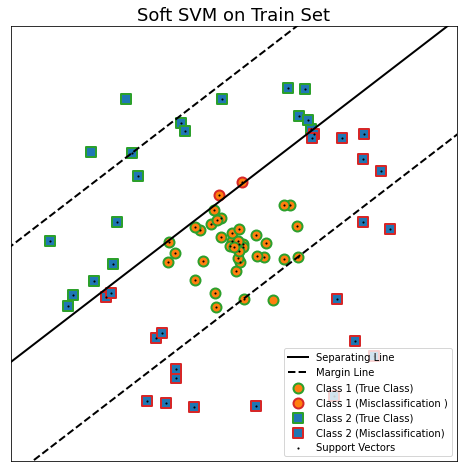

In [89]:
plt.figure(figsize=(8, 8))

# Predict Classes
y_train_1_pred = Linear_SVM.predict(x_train_1)
y_train_2_pred = Linear_SVM.predict(x_train_2)
y_test_1_pred = Linear_SVM.predict(x_test_1)
y_test_1_pred = Linear_SVM.predict(x_test_2)

# Plot Data
for i in range(x_train_1.shape[0]):
    if Linear_SVM.predict(x_train_1[i, :].reshape(1, -1)) == y_train_1[i, :] :
        plt.scatter(x_train_1[i, 0], x_train_1[i, 1], s=100, color='tab:orange', marker='o', edgecolors='tab:green', linewidth=2, label='Class 1 (True Class)')
    else:
        plt.scatter(x_train_1[i, 0], x_train_1[i, 1], s=100, color='tab:orange', marker='o', edgecolors='tab:red', linewidth=2, label='Class 1 (Misclassification )')

for i in range(x_train_2.shape[0]):
    if Linear_SVM.predict(x_train_2[i, :].reshape(1, -1)) == y_train_2[i, :] :
        plt.scatter(x_train_2[i, 0], x_train_2[i, 1], s=100, color='tab:blue', marker='s', edgecolors='tab:green', linewidth=2, label='Class 2 (True Class)')
    else:
        plt.scatter(x_train_2[i, 0], x_train_2[i, 1], s=100, color='tab:blue', marker='s', edgecolors='tab:red', linewidth=2, label='Class 2 (Misclassification)')

# Plor Support Vectors
plt.scatter(Linear_SVM.support_vectors_[:, 0], Linear_SVM.support_vectors_[:, 1], s=5, color='k', marker='.', label='Support Vectors')

# Plor Lines
svm_w = Linear_SVM.coef_[0]
svm_m = -svm_w[0] / svm_w[1]
x = np.linspace(-7, 7)
plt.plot(x, svm_m * x - Linear_SVM.intercept_[0] / svm_w[1], 'k', linewidth=2, label='Separating Line')
plt.plot(x, svm_m * x - (Linear_SVM.intercept_[0] - 1) / svm_w[1], 'k--', linewidth=2, label='Margin Line')
plt.plot(x, svm_m * x - (Linear_SVM.intercept_[0] + 1) / svm_w[1], 'k--', linewidth=2, label='Margin Line')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='lower right')
plt.xticks([])
plt.yticks([])
plt.title('Soft SVM on Train Set', fontsize=18)

**Plot for Testing Data**

Text(0.5, 1.0, 'Soft SVM on Test Set')

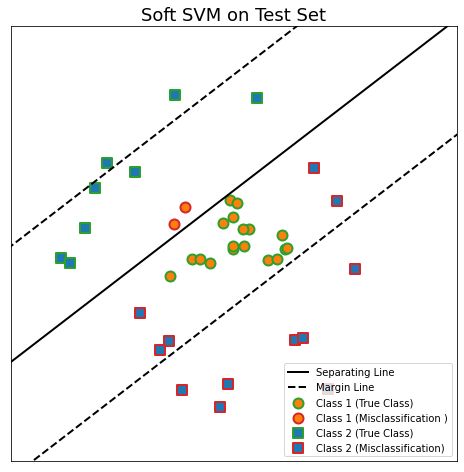

In [87]:
plt.figure(figsize=(8, 8))

y_test_1_pred = Linear_SVM.predict(x_test_1)
y_test_2_pred = Linear_SVM.predict(x_test_2)
y_test_1_pred = Linear_SVM.predict(x_test_1)
y_test_1_pred = Linear_SVM.predict(x_test_2)

for i in range(x_test_1.shape[0]):
    if Linear_SVM.predict(x_test_1[i, :].reshape(1, -1)) == y_test_1[i, :] :
        plt.scatter(x_test_1[i, 0], x_test_1[i, 1], s=100, color='tab:orange', marker='o', edgecolors='tab:green', linewidth=2, label='Class 1 (True Class)')
    else:
        plt.scatter(x_test_1[i, 0], x_test_1[i, 1], s=100, color='tab:orange', marker='o', edgecolors='tab:red', linewidth=2, label='Class 1 (Misclassification )')

for i in range(x_test_2.shape[0]):
    if Linear_SVM.predict(x_test_2[i, :].reshape(1, -1)) == y_test_2[i, :] :
        plt.scatter(x_test_2[i, 0], x_test_2[i, 1], s=100, color='tab:blue', marker='s', edgecolors='tab:green', linewidth=2, label='Class 2 (True Class)')
    else:
        plt.scatter(x_test_2[i, 0], x_test_2[i, 1], s=100, color='tab:blue', marker='s', edgecolors='tab:red', linewidth=2, label='Class 2 (Misclassification)')

svm_w = Linear_SVM.coef_[0]
svm_m = -svm_w[0] / svm_w[1]
x = np.linspace(-7, 7)
plt.plot(x, svm_m * x - Linear_SVM.intercept_[0] / svm_w[1], 'k', linewidth=2, label='Separating Line')
plt.plot(x, svm_m * x - (Linear_SVM.intercept_[0] - 1) / svm_w[1], 'k--', linewidth=2, label='Margin Line')
plt.plot(x, svm_m * x - (Linear_SVM.intercept_[0] + 1) / svm_w[1], 'k--', linewidth=2, label='Margin Line')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='lower right')
plt.xticks([])
plt.yticks([])
plt.title('Soft SVM on Test Set', fontsize=18)

# **1-C**

**Finding Best Kernel**

In [75]:
kf = KFold(n_splits=10, shuffle=True)

acc_val_rbf_list = []
acc_val_poly2_list = []
acc_val_poly3_list = []

# K Fold
for train_index, valid_index in kf.split(x_train):
    x_train_fold = x_train[train_index]
    y_train_fold = y_train[train_index]
    x_val_fold = x_train[valid_index]
    y_val_fold = y_train[valid_index]
    RBF_SVM = SVC(kernel='rbf')
    RBF_SVM.fit(x_train_fold, y_train_fold.ravel())
    Poly2_SVM = SVC(kernel='poly', degree=2)
    Poly2_SVM.fit(x_train_fold, y_train_fold.ravel())
    Poly3_SVM = SVC(kernel='poly', degree=3)
    Poly3_SVM.fit(x_train_fold, y_train_fold.ravel())

    # For RBF
    y_val_rbf_pred = RBF_SVM.predict(x_val_fold)
    acc_val_rbf_fold = 100 * accuracy_score(y_val_fold, y_val_rbf_pred)
    acc_val_rbf_list.append(acc_val_rbf_fold)
    # For Poly2
    y_val_poly2_pred = Poly2_SVM.predict(x_val_fold)
    acc_val_poly2_fold = 100 * accuracy_score(y_val_fold, y_val_poly2_pred)
    acc_val_poly2_list.append(acc_val_poly2_fold)
    # For Poly3
    y_val_poly3_pred = Poly3_SVM.predict(x_val_fold)
    acc_val_poly3_fold = 100 * accuracy_score(y_val_fold, y_val_poly3_pred)
    acc_val_poly3_list.append(acc_val_poly3_fold)

acc_val_rbf = sum(acc_val_rbf_list) / len(acc_val_rbf_list)
acc_val_poly2 = sum(acc_val_poly2_list) / len(acc_val_poly2_list)
acc_val_poly3 = sum(acc_val_poly3_list) / len(acc_val_poly3_list)
print('---------------------')
print('Validation Accuracy for RBF Kernel :', str(round(acc_val_rbf, 2)), '%')
print('Validation Accuracy for Poly2 Kernel :', str(round(acc_val_poly2, 2)), '%')
print('Validation Accuracy for Poly3 Kernel :', str(round(acc_val_poly3, 2)), '%')
print('---------------------')

---------------------
Validation Accuracy for RBF Kernel : 100.0 %
Validation Accuracy for Poly2 Kernel : 100.0 %
Validation Accuracy for Poly3 Kernel : 43.75 %
---------------------


**SVM Accuracy for Best Kernel**

In [76]:
y_train_pred = RBF_SVM.predict(x_train)
y_test_pred = RBF_SVM.predict(x_test)
acc_train = 100 * accuracy_score(y_train, y_train_pred)
acc_test = 100 * accuracy_score(y_test, y_test_pred)
print('---------------------')
print('Train Accuracy :', str(round(acc_train, 2)), '%')
print('Test Accuracy :', str(round(acc_test, 2)), '%')
print('---------------------')

---------------------
Train Accuracy : 100.0 %
Test Accuracy : 100.0 %
---------------------


**Plot for Training Data**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'label'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'label'


Text(0.5, 1.0, 'SVM on Train Set')

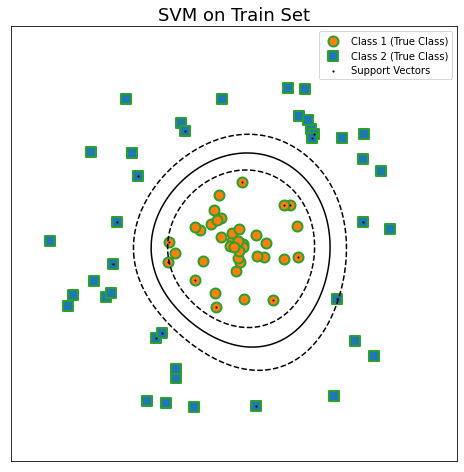

In [77]:
plt.figure(figsize=(8, 8))

y_train_1_pred = RBF_SVM.predict(x_train_1)
y_train_2_pred = RBF_SVM.predict(x_train_2)
y_test_1_pred = RBF_SVM.predict(x_test_1)
y_test_1_pred = RBF_SVM.predict(x_test_2)

for i in range(x_train_1.shape[0]):
    if RBF_SVM.predict(x_train_1[i, :].reshape(1, -1)) == y_train_1[i, :] :
        plt.scatter(x_train_1[i, 0], x_train_1[i, 1], s=100, color='tab:orange', marker='o', edgecolors='tab:green', linewidth=2, label='Class 1 (True Class)')
    else:
        plt.scatter(x_train_1[i, 0], x_train_1[i, 1], s=100, color='tab:orange', marker='o', edgecolors='tab:red', linewidth=2, label='Class 1 (Misclassification )')

for i in range(x_train_2.shape[0]):
    if RBF_SVM.predict(x_train_2[i, :].reshape(1, -1)) == y_train_2[i, :] :
        plt.scatter(x_train_2[i, 0], x_train_2[i, 1], s=100, color='tab:blue', marker='s', edgecolors='tab:green', linewidth=2, label='Class 2 (True Class)')
    else:
        plt.scatter(x_train_2[i, 0], x_train_2[i, 1], s=100, color='tab:blue', marker='s', edgecolors='tab:red', linewidth=2, label='Class 2 (Misclassification)')


plt.scatter(RBF_SVM.support_vectors_[:, 0], RBF_SVM.support_vectors_[:, 1], s=5, color='k', marker='.', label='Support Vectors')
XX, YY = np.mgrid[-6:6:200j, -6:6:200j]
Z = RBF_SVM.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)
plt.contour(XX, YY, Z, colors=['k'], linestyles=['-'], levels=[0], label='Separating Line')
plt.contour(XX, YY, Z, colors=['k', 'k'], linestyles=['--', '--'], levels=[-0.5, 0.5], label='Margin Line')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xticks([])
plt.yticks([])
plt.title('SVM on Train Set', fontsize=18)

**Plot for Testing Data**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'label'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'label'


Text(0.5, 1.0, 'SVM on Test Set')

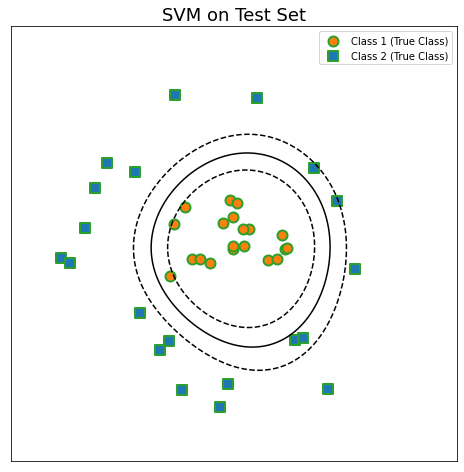

In [78]:
plt.figure(figsize=(8, 8))

y_test_1_pred = RBF_SVM.predict(x_test_1)
y_test_2_pred = RBF_SVM.predict(x_test_2)
y_test_1_pred = RBF_SVM.predict(x_test_1)
y_test_1_pred = RBF_SVM.predict(x_test_2)

for i in range(x_test_1.shape[0]):
    if RBF_SVM.predict(x_test_1[i, :].reshape(1, -1)) == y_test_1[i, :] :
        plt.scatter(x_test_1[i, 0], x_test_1[i, 1], s=100, color='tab:orange', marker='o', edgecolors='tab:green', linewidth=2, label='Class 1 (True Class)')
    else:
        plt.scatter(x_test_1[i, 0], x_test_1[i, 1], s=100, color='tab:orange', marker='o', edgecolors='tab:red', linewidth=2, label='Class 1 (Misclassification )')

for i in range(x_test_2.shape[0]):
    if RBF_SVM.predict(x_test_2[i, :].reshape(1, -1)) == y_test_2[i, :] :
        plt.scatter(x_test_2[i, 0], x_test_2[i, 1], s=100, color='tab:blue', marker='s', edgecolors='tab:green', linewidth=2, label='Class 2 (True Class)')
    else:
        plt.scatter(x_test_2[i, 0], x_test_2[i, 1], s=100, color='tab:blue', marker='s', edgecolors='tab:red', linewidth=2, label='Class 2 (Misclassification)')

XX, YY = np.mgrid[-6:6:200j, -6:6:200j]
Z = RBF_SVM.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)
plt.contour(XX, YY, Z, colors=['k'], linestyles=['-'], levels=[0], label='Separating Line')
plt.contour(XX, YY, Z, colors=['k', 'k'], linestyles=['--', '--'], levels=[-0.5, 0.5], label='Margin Line')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xticks([])
plt.yticks([])
plt.title('SVM on Test Set', fontsize=18)

# **2-A**

In [91]:
# Import Data
data_train=pd.read_csv('adult.train.10k.discrete', 
                       names=['50k', 'Workclass', 'Education', 'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-Country'])
data_test=pd.read_csv('adult.test.10k.discrete', 
                      names=['50k', 'Workclass', 'Education', 'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-Country'])

# Change Features to Numbers
for col in data_train.columns:
    le = LabelEncoder()
    data_train[col] = le.fit_transform(data_train[col])
    data_test[col] = le.transform(data_test[col])

# Separate Labels
x_train = np.asarray(data_train.drop(columns=['50k']).values)
y_train = np.asarray(data_train['50k'].values)
for i in range(y_train.shape[0]):
    if y_train[i] == 0:
        y_train[i] = -1
x_test = data_test.drop(columns=['50k']).values
y_test = data_test['50k'].values
for i in range(y_test.shape[0]):
    if y_test[i] == 0:
        y_test[i] = -1

# SVM
Linear_SVM = SVC(kernel='linear')
Linear_SVM.fit(x_train, y_train)

# Accuracy
y_train_pred = Linear_SVM.predict(x_train)
y_test_pred = Linear_SVM.predict(x_test)
acc_train = 100 * accuracy_score(y_train, y_train_pred)
acc_test = 100 * accuracy_score(y_test, y_test_pred)

# Print Result
print('---------------------')
print('Train Accuracy :', str(round(acc_train, 2)), '%')
print('Test Accuracy :', str(round(acc_test, 2)), '%')
print('Number of Support Vectors :',len(Linear_SVM.support_vectors_))
print('---------------------')

---------------------
Train Accuracy : 75.5 %
Test Accuracy : 75.39 %
Number of Support Vectors : 5049
---------------------


# **2-B**

---------------------
C with Maximum Validation Accuracy : 0.001
Maximum Validation Accuracy : 75.72 %
---------------------


Text(0.5, 1.0, 'Validation Accuracy of Soft SVM')

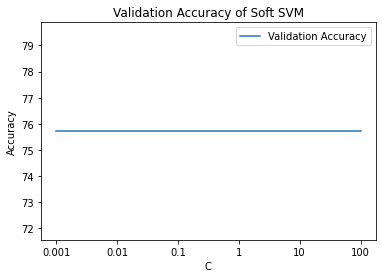

In [10]:
C = np.asarray([0.001, 0.01, 0.1, 1, 10, 100])

x_train_v, x_val, y_train_v, y_val = train_test_split(x_train, y_train, test_size=0.25)

acc_val_list = []
for c in C:
  Linear_SVM = SVC(C=c, kernel='linear')
  Linear_SVM.fit(x_train_v, y_train_v)
  y_val_perd = Linear_SVM.predict(x_val)
  acc_val = 100 * accuracy_score(y_val, y_val_perd)
  acc_val_list.append(acc_val)

acc_val_max = max(acc_val_list)
acc_val_max_index = acc_val_list. index(acc_val_max)
acc_val_max_c = C[acc_val_max_index]

print('---------------------')
print('C with Maximum Validation Accuracy :', acc_val_max_c)
print('Maximum Validation Accuracy :', str(round(acc_val_max, 2)), '%')
print('---------------------')

fig, ax = plt.subplots()
ax.plot(np.asarray(acc_val_list), label='Validation Accuracy')
ax.set_xticklabels(('-', '0.001', '0.01', '0.1', '1', '10', '100'))
ax.legend(loc='best')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy of Soft SVM')

In [94]:
Linear_SVM = SVC(C=0.001, kernel='linear')
Linear_SVM.fit(x_train, y_train)
y_train_perd = Linear_SVM.predict(x_train)
y_test_perd = Linear_SVM.predict(x_test)
acc_train = 100 * accuracy_score(y_train, y_train_perd)
acc_train = 100 * accuracy_score(y_test, y_test_perd)

# Print Result
print('---------------------')
print('Train Accuracy :', str(round(acc_train, 2)), '%')
print('Test Accuracy :', str(round(acc_test, 2)), '%')
print('Number of Support Vectors :',len(Linear_SVM.support_vectors_))
print('---------------------')

---------------------
Train Accuracy : 75.39 %
Test Accuracy : 75.39 %
Number of Support Vectors : 4919
---------------------


# **2-C**

In [95]:
x_train_v, x_val, y_train_v, y_val = train_test_split(x_train, y_train, test_size=0.24)

Poly2_SVM = SVC(kernel='poly', degree=2)
Poly2_SVM.fit(x_train_v, y_train_v.ravel())
Poly3_SVM = SVC(kernel='poly', degree=3)
Poly3_SVM.fit(x_train_v, y_train_v.ravel())
Poly4_SVM = SVC(kernel='poly', degree=4)
Poly4_SVM.fit(x_train_v, y_train_v.ravel())
Poly5_SVM = SVC(kernel='poly', degree=5)
Poly5_SVM.fit(x_train_v, y_train_v.ravel())
RBF_SVM = SVC(kernel='rbf')
RBF_SVM.fit(x_train_v, y_train_v.ravel())

# For Poly2
y_val_poly2_pred = Poly2_SVM.predict(x_val)
acc_val_poly2 = 100 * accuracy_score(y_val, y_val_poly2_pred)
# For Poly3
y_val_poly3_pred = Poly3_SVM.predict(x_val)
acc_val_poly3 = 100 * accuracy_score(y_val, y_val_poly3_pred)
# For Poly4
y_val_poly4_pred = Poly4_SVM.predict(x_val)
acc_val_poly4 = 100 * accuracy_score(y_val, y_val_poly4_pred)
# For Poly5
y_val_poly5_pred = Poly5_SVM.predict(x_val)
acc_val_poly5 = 100 * accuracy_score(y_val, y_val_poly5_pred)
# For RBF
y_val_rbf_pred = RBF_SVM.predict(x_val)
acc_val_rbf = 100 * accuracy_score(y_val, y_val_rbf_pred)

print('---------------------')
print('Validation Accuracy for Poly2 Kernel :', str(round(acc_val_poly2, 2)), '%')
print('Number of Support Vectors for Poly2 Kernel :',len(Poly2_SVM.support_vectors_))
print('---------------------')
print('Validation Accuracy for Poly3 Kernel :', str(round(acc_val_poly3, 2)), '%')
print('Number of Support Vectors for Poly3 Kernel :',len(Poly3_SVM.support_vectors_))
print('---------------------')
print('Validation Accuracy for Poly4 Kernel :', str(round(acc_val_poly4, 2)), '%')
print('Number of Support Vectors for Poly4 Kernel :',len(Poly4_SVM.support_vectors_))
print('---------------------')
print('Validation Accuracy for Poly5 Kernel :', str(round(acc_val_poly5, 2)), '%')
print('Number of Support Vectors for Poly5 Kernel :',len(Poly5_SVM.support_vectors_))
print('---------------------')
print('Validation Accuracy for RBF Kernel :', str(round(acc_val_rbf, 2)), '%')
print('Number of Support Vectors for RBF Kernel :',len(RBF_SVM.support_vectors_))
print('---------------------')

---------------------
Validation Accuracy for Poly2 Kernel : 75.5 %
Number of Support Vectors for Poly2 Kernel : 4030
---------------------
Validation Accuracy for Poly3 Kernel : 75.5 %
Number of Support Vectors for Poly3 Kernel : 3950
---------------------
Validation Accuracy for Poly4 Kernel : 75.5 %
Number of Support Vectors for Poly4 Kernel : 3927
---------------------
Validation Accuracy for Poly5 Kernel : 75.5 %
Number of Support Vectors for Poly5 Kernel : 3932
---------------------
Validation Accuracy for RBF Kernel : 75.5 %
Number of Support Vectors for RBF Kernel : 3929
---------------------


In [97]:
RBF_SVM = SVC(kernel='rbf')
RBF_SVM.fit(x_train, y_train.ravel())
y_train_perd = RBF_SVM.predict(x_train)
y_test_perd = RBF_SVM.predict(x_test)
acc_train = 100 * accuracy_score(y_train, y_train_perd)
acc_test = 100 * accuracy_score(y_test, y_test_perd)

# Print Result
print('---------------------')
print('Train Accuracy :', str(round(acc_train, 2)), '%')
print('Test Accuracy :', str(round(acc_test, 2)), '%')
print('Number of Support Vectors :',len(RBF_SVM.support_vectors_))
print('---------------------')

---------------------
Train Accuracy : 75.5 %
Test Accuracy : 75.39 %
Number of Support Vectors : 5086
---------------------


# **2-D**

---------------------
C with Maximum Validation Accuracy : 0.001
Maximum Validation Accuracy : 75.32 %
---------------------


Text(0.5, 1.0, 'Validation Accuracy of RBF SVM')

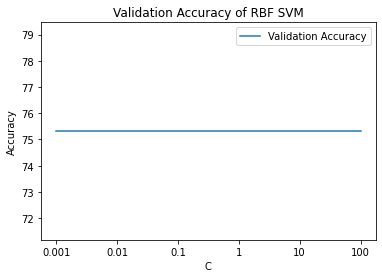

In [19]:
C = np.asarray([0.001, 0.01, 0.1, 1, 10, 100])

x_train_v, x_val, y_train_v, y_val = train_test_split(x_train, y_train, test_size=0.25)

acc_val_list = []
for c in C:
  RBF_SVM = SVC(C=c, kernel='rbf')
  RBF_SVM.fit(x_train_v, y_train_v)
  y_val_perd = RBF_SVM.predict(x_val)
  acc_val = 100 * accuracy_score(y_val, y_val_perd)
  acc_val_list.append(acc_val)

acc_val_max = max(acc_val_list)
acc_val_max_index = acc_val_list. index(acc_val_max)
acc_val_max_c = C[acc_val_max_index]

print('---------------------')
print('C with Maximum Validation Accuracy :', acc_val_max_c)
print('Maximum Validation Accuracy :', str(round(acc_val_max, 2)), '%')
print('---------------------')

fig, ax = plt.subplots()
ax.plot(np.asarray(acc_val_list), label='Validation Accuracy')
ax.set_xticklabels(('-', '0.001', '0.01', '0.1', '1', '10', '100'))
ax.legend(loc='best')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy of RBF SVM')

In [98]:
RBF_SVM = SVC(C=0.001, kernel='rbf')
RBF_SVM.fit(x_train, y_train.ravel())
y_train_perd = RBF_SVM.predict(x_train)
y_test_perd = RBF_SVM.predict(x_test)
acc_train = 100 * accuracy_score(y_train, y_train_perd)
acc_test = 100 * accuracy_score(y_test, y_test_perd)

# Print Result
print('---------------------')
print('Train Accuracy :', str(round(acc_train, 2)), '%')
print('Test Accuracy :', str(round(acc_test, 2)), '%')
print('Number of Support Vectors :',len(RBF_SVM.support_vectors_))
print('---------------------')

---------------------
Train Accuracy : 75.5 %
Test Accuracy : 75.39 %
Number of Support Vectors : 4901
---------------------
